# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2024

Мягкий дедлайн: 22.12.2024 23:59 MSK

Жёсткий дедлайн: 22.12.2024 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг. Однако с большой силой приходит и большая ответственность, так что заодно научимся, как его правильно готовить

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split

sns.set_theme(style='darkgrid')
filterwarnings('ignore')

In [2]:
X = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (оставьте `random_state=1337` для воспроизводимости).

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1337)

X_train.shape, X_val.shape, X_test.shape

((18825, 169), (2354, 169), (2353, 169))

---

## Задание 1. Базовый градиентный бустинг (4 балла)

Первая часть посвящена реализации собственного градиентного бустинга. Обращаем внимание, что пользоваться готовыми реализациями <font color='lightcoral'>**нельзя**</font>, если специально не оговорено. На все <font color='plum'>**вопросы**</font> должен быть <font color='plum'>**ответ**</font>. В заданиях есть референсы для параметров, которые нужно сделать, на случай, если объяснение из ноутбука непонятно, тогда советуем обратиться к соответствующей документации

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

Обязательные параметры:
 — `base_model_class` — класс базовой модели нашего бустинга
 — `base_model_params` — словарь с гиперпараметрами для базовой модели
 — `n_estimators` — какое количество базовых моделей нужно обучить
 — `learning_rate` — темп обучения, должен быть из полуинтервала $(0, 1]$

#### `fit`

В `fit` приходит выборка, на которой мы обучаем новые базовые модели

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на выборке (используем `loss_fn` для этого) и найти новую оптимальную гамму

После всего цикла обучения надо нарисовать график (если `plot=True`).

#### `partial_fit`

В `partial_fit` приходит обучающая выборка, на которую обучается новая базовая модель

#### `predict_proba`

В `predict_proba` приходит любая выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду

#### `plot_history`

В `plot_history` приходит любая выборка, для которой последовательно считаются значения функции потерь и/или любой метрики, которую вы хотите посчитать, путем последовательного применения базовых моделей. Можно делать сразу во время обучения, можно делать иначе

In [4]:
%load_ext autoreload
%autoreload 2

from boosting import Boosting

### Проверка кода

In [5]:
X_train = X_train.toarray() if hasattr(X_train, "toarray") else np.asarray(X_train) #densify
X_val = X_val.toarray() if hasattr(X_val, "toarray") else np.asarray(X_val)         #densify
X_test = X_test.toarray() if hasattr(X_test, "toarray") else np.asarray(X_test)     #densify

10/100, ROC AUC: 0.9998, Loss: 0.4830, Time: 14.52
20/100, ROC AUC: 0.9998, Loss: 0.3678, Time: 21.15
30/100, ROC AUC: 0.9998, Loss: 0.2928, Time: 26.52
40/100, ROC AUC: 0.9998, Loss: 0.2416, Time: 32.23
50/100, ROC AUC: 0.9998, Loss: 0.2050, Time: 37.20
60/100, ROC AUC: 0.9998, Loss: 0.1777, Time: 43.94
70/100, ROC AUC: 0.9998, Loss: 0.1568, Time: 50.23
80/100, ROC AUC: 0.9998, Loss: 0.1404, Time: 55.70
90/100, ROC AUC: 0.9998, Loss: 0.1272, Time: 62.28


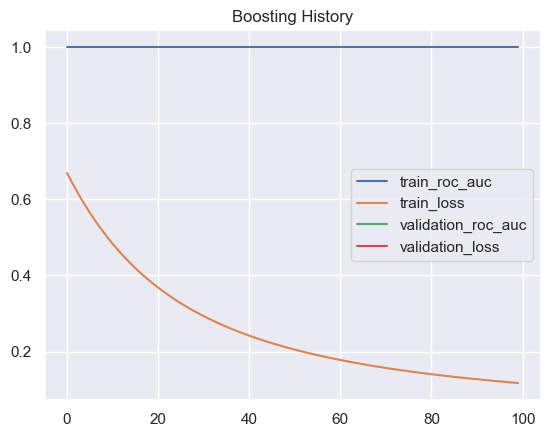

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9135
Test ROC-AUC 0.9110


In [17]:
boosting = Boosting(n_estimators=100)

boosting.fit(X_train, y_train)
boosting.plot_history()

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

---

## Задание 2. Имплементация гиперпараметров (2.5 балла + 3.5 бонус)

Бустинг, как метод агрегации, предлагает несколько вариантов регуляризации безотносительно базовой модели. В этом пункте предлагается имплементировать часть из них. При необходимости можете обратиться к реализациям в вашей любимой библиотеке, там могут быть дополнительные пояснения и/или ссылки на оригинальные статьи

<font color='lightcoral'>**Важно!**</font> После добавления каждого параметра проверьте, как это повлияет на качество. Специально крутить параметры не нужно, но важно увидеть, что перформанс модели изменился, в худшую или в лучшую сторону, для этого какие-то параметры нужны, пусть и от балды, <font color='lightcoral'>**дефолтные параметры не подойдут**</font>, они скорее для референса. Лучше всего это видно по графикам обучения <font color='lightcoral'>**на трейне и валидации**</font>, рекомендуется смотрить именно на них

### 2.1. Борьба с переобучением (0.5 балла)

Как известно, бустинги бывают склонны к переобучению. Чтобы этого не допустить, можно контролировать процесс обучения и проверять критерий останова на валидации. Реализуйте такую процедуру, не забудьте, что всю предобработку, что вы будете делать для трейна, нужно будет повторить на валидации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| <td colspan=3>`early_stopping_rounds`, `eval_set` |

Добавьте параметры:
- `early_stopping_rounds: int | None = 0` — число раундов для критерия останова. Если качество ухудшается на протяжении всех раундов подряд, останавливаем обучение
- `X_val`, `y_val` или `eval_set: Tuple[np.ndarray] | None = None` — валидацонная выборка, на которой будем проверять переобучение

10/100, ROC AUC: 0.9332, Loss: 0.5662, Time: 8.70
20/100, ROC AUC: 0.9391, Loss: 0.4944, Time: 13.93
30/100, ROC AUC: 0.9421, Loss: 0.4460, Time: 20.08
40/100, ROC AUC: 0.9451, Loss: 0.4118, Time: 25.72
50/100, ROC AUC: 0.9471, Loss: 0.3864, Time: 30.92
60/100, ROC AUC: 0.9486, Loss: 0.3673, Time: 37.17
70/100, ROC AUC: 0.9502, Loss: 0.3518, Time: 42.61
80/100, ROC AUC: 0.9515, Loss: 0.3394, Time: 48.16
90/100, ROC AUC: 0.9526, Loss: 0.3292, Time: 54.50


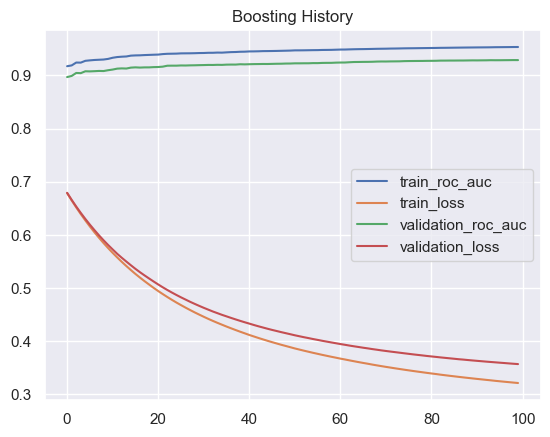

Train ROC-AUC 0.9534
Valid ROC-AUC 0.9288
Test ROC-AUC 0.9274


In [19]:
boosting = Boosting(
    early_stopping_rounds=10,
    n_estimators=100,
    base_model_params={'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5},
)

boosting.fit(X_train, y_train, X_val, y_val)
boosting.plot_history()

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### Бонус. Бустинг линейных моделей (0.5 балла)

**<font color='plum'>Вопрос:** что произойдет при ансамблировании линейных моделей? Имеет ли это смысл?</font>

<font color='plum'>**Ответ:** ...</font>

Давайте убедимся. Обучите бустинг, где в качестве базовой модели будет линейная регрессия. Обязательно сохраните историю функции потерь и зафиксируйте время обучения. Можно взять уже готовый из <font color='lightblue'>**XGBoost**</font>, но будьте готовы разобраться с тем, как оттуда достать историю обучения

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="gblinear")` | — | — |

Time taken for XGBoost: 0.23 seconds
Time taken for SGDClassifier: 0.63 seconds


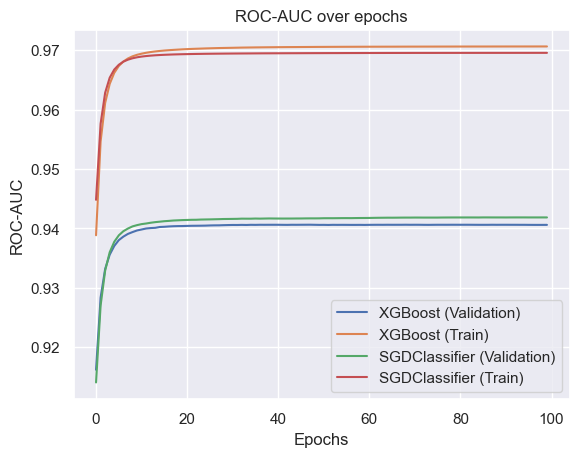

In [12]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from datetime import datetime

time_then = datetime.now()
xgb_model = xgb.XGBClassifier(
    booster='gblinear',
    n_estimators=100,
    # learning_rate=0.1,
    random_state=42,
    eval_metric='auc',
)
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val), (X_train, y_train)], verbose=False)
scores = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
history = xgb_model.evals_result()

plt.plot(history['validation_0']['auc'], label='XGBoost (Validation)')
plt.plot(history['validation_1']['auc'], label='XGBoost (Train)')
print(f'Time taken for XGBoost: {(datetime.now() - time_then).total_seconds():.2f} seconds')

from sklearn.linear_model import SGDClassifier

time_then = datetime.now()
sgd_model = SGDClassifier(
    loss='log_loss',
    random_state=42,
    warm_start=True,
)

losses_train = []
losses_validation = []
epochs = 100
for _ in range(epochs):
    sgd_model.partial_fit(X_train, y_train, classes=np.unique(y_train))
    losses_train.append(roc_auc_score(y_train, sgd_model.predict_proba(X_train)[:, 1]))
    losses_validation.append(roc_auc_score(y_val, sgd_model.predict_proba(X_val)[:, 1]))

plt.plot(losses_validation, label='SGDClassifier (Validation)')
plt.plot(losses_train, label='SGDClassifier (Train)')
print(f'Time taken for SGDClassifier: {(datetime.now() - time_then).total_seconds():.2f} seconds')

plt.xlabel('Epochs')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC over epochs')
plt.legend()
plt.show()

Теперь возьмите `sklearn.linear_model.SGDClassifier` иобучите на тех же данных. Не забудьте вытащить историю функции потерь

Покажите на одном графике изменение функции потерь для бустинга и SGD классификатора. Сравните следующие детали у бустинга и линейной модели:

- время обучения
- сходимость (как быстро, как стабильно и прочее)
- графики функции потерь на трейне и на валидации

<font color='plum'>**Вопрос:** Какой вывод вы можете сделать?</font>

<font color='plum'>**Ответ:** ...</font>

### 2.2. Бутстрап (0.5 балла)
Как известно, при обучении базовых алгоритмов в беггинге, используется бутстрапированная выборка. Звучит хайпово, почему бы не попробовать сделать то же самое в бустинге?

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `subsample`, — | `subsample`, `bagging`| `subsample`, `bootstrap_type`|

Вам нужно реализовать параметры:
- `subsample: float | int = 1.0` — доля или число объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей). Соответствует бутстрапу типа `Bernoulli`. Каждый объект либо входит в подвыборку, либо нет
- `bagging_temperature: float | int = 1.0` — веса объектов, которые попадают в выборку. Соответствует бутстрапу типа `Bayesian`. Каждый объект имеет определенный вес $t$, на который впоследствии домножается по формуле $w = (-\log(X))^t$, где $X \sim {U[0, 1]}$, после чего попадает в выборку. Таким образом можно сделать симуляцию повторений
- `bootstrap_type: str | None = 'Bernoulli'` — тип бутстрапа

<font color='plum'>**Вопрос:** как бутстрап может помочь в обучении с точки зрения смещения, разброса и вообще?</font>

<font color='plum'>**Ответ:** уменьшит разброс </font>

10/100, ROC AUC: 0.9369, Loss: 0.5661, Time: 1.42
20/100, ROC AUC: 0.9409, Loss: 0.4940, Time: 2.35
30/100, ROC AUC: 0.9438, Loss: 0.4453, Time: 3.45
40/100, ROC AUC: 0.9457, Loss: 0.4110, Time: 4.64
50/100, ROC AUC: 0.9475, Loss: 0.3857, Time: 5.61
60/100, ROC AUC: 0.9490, Loss: 0.3662, Time: 6.62
70/100, ROC AUC: 0.9506, Loss: 0.3506, Time: 7.68
80/100, ROC AUC: 0.9519, Loss: 0.3382, Time: 8.69
90/100, ROC AUC: 0.9530, Loss: 0.3281, Time: 9.81


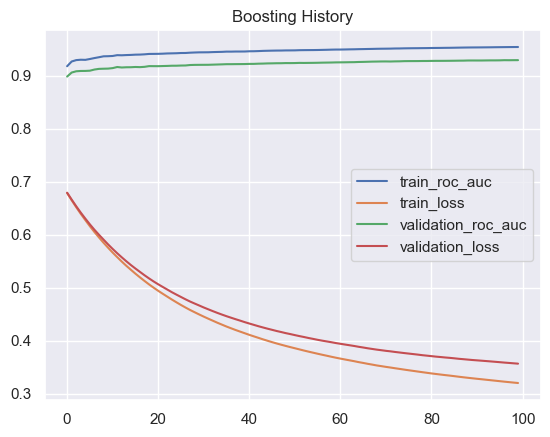

Train ROC-AUC 0.9538
Valid ROC-AUC 0.9290
Test ROC-AUC 0.9286


In [15]:
boosting = Boosting(
    early_stopping_rounds=10,
    n_estimators=100,
    base_model_params={'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5},
    bagging_temperature=.5,
    bootstrap_type='Bernoulli',
)

boosting.fit(X_train, y_train, X_val, y_val)
boosting.plot_history()

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### Бонус. GOSS (0.5 балла)

Заметим, что во время обучения не все объекты одинаково важны. Один из вариантов это исправить — ввести какие-то веса на объекты, однако можно пойти чуть хитрее. В <font color='lightgreen'>**LightGBM**</font> придумали подход [Gradient-based One-side Sampling](https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf)

Давайте оценивать важность объектов в отдельный момент обучения нового дерева. Будем считать, какой антиградиент привносит каждый объект. Далее разобъем градиенты на 2 группы. Объекты с большими градиентами берутся все, с маленькими — только часть, по аналогии с бутстрапом, с отрицательными — выкидываются. И не забываем домножить на фактор, чтобы учесть выкинутые объекты. Подробнее в статье

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | `bagging='goss'`| `bootstrap_type='MVS'`|

Параметры, которые нужно сделать:

- `goss: bool | None = False` — GOSS бустинг или нет
- `goss_k: float | int = 0.2` — доля объектов, градиенты которых будем считать большими. Все остальное — маленькими
- `subsample: float | int = 0.3` — параметры сэмплинга для маленьких градиентов из пункта 2.1

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 2.3. Работа с признаками (1 балл)

1. Помимо выбора случайных объектов, есть идея выбирать случайное подмножество признаков, заложенная в Random Forest. Мотивация это делать точно та же самая, что и в бутстрапировании, за это будет отвечать `rsm`

2. С другой стороны, вместо того, чтобы выкидывать признаки, можно попробовать проредить их множество значений, применив бинаризацию. В идеале это стоит делать с датасетом до обучения модели, но не обязательно, можно, например, на этапе `fit`, а в `partial_fit` приходит уже квантизованный датасет. Для этого существует множество алгоритмов, мы предлагаем сделать два наиболее простых:

- $\text{Uniform}$. Значения признака $[\min f_i, \max f_i]$ отображаются в `nbins` отрезков одинаковой длины, которые полностью покрывают интервал
- $\text{Quantile}$. Тот же самый отрезок сортируется и бьется на `nbins` квантилей от 0 до 1

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `colsample_bytree`, `tree_method` | `colsample_bytree`, `max_bin`| `rsm`, `quantize(...)`|

Нужно добавить параметры:
- `rsm: float | int = 1.0` — доля или число признаков, участвующих в обучении модели. Каждый признак либо входит, либо не входит в пул, на котором обучается базовый алгоритм, по аналогии с бутстрапом Бернулли
- `quantization_type: str | None = None` — тип квантизации, если она есть
- `nbins: int = 255` — число бинов для квантизации. Игнорируем, если тип квантизации не указан

<font color='plum'>**Вопрос**: как квантизация поможет в обработке выбросов и нанов?</font>

<font color='plum'>**Ответ**: ... </font>

<font color='plum'>**Вопрос**: можно ли просто заполнить наны каким-то числом? Имеет ли значение, что это за число (-1, -100, -1e32)?</font>

<font color='plum'>**Ответ**: ... </font>

10/100, ROC AUC: 0.9463, Loss: 0.5815, Time: 1.91
20/100, ROC AUC: 0.9492, Loss: 0.5122, Time: 2.78
30/100, ROC AUC: 0.9503, Loss: 0.4631, Time: 3.84
Early stopping at iteration 38, best model depth: 29


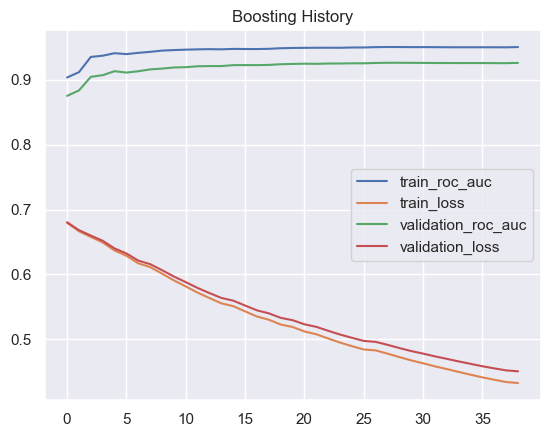

Train ROC-AUC 0.9504
Valid ROC-AUC 0.9261
Test ROC-AUC 0.9271


In [16]:
boosting = Boosting(
    early_stopping_rounds=10,
    n_estimators=100,
    base_model_params={'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5},
    bagging_temperature=1.0,
    bootstrap_type='Bayesian',
    rsm=.75,
    quantization_type='quantile',
    nbins=64
)

boosting.fit(X_train, y_train, X_val, y_val)
boosting.plot_history()

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### Бонус. Квантизация (1.5 балл)

В текущих имплементациях бустинга используются более сложные методы квантизации. К сожалению, способы выше страдают либо от неравноправности бинов — в каких-то объектов больше, в каких-то меньше, либо от того, что целевая переменная от бинов зависит опосредованно. Предлагается это исправить следующими способами:

1. $\text{MinEntropy}$. Это [один из методов](https://catboost.ai/docs/en/concepts/quantization), который используется для бинаризации в <font color='palegoldenrod'>**CatBoost**</font>, остальные на него очень похожи. Будем жадно набирать бины так, чтобы энтропия объектов внутри ($\sum_{i \in \text{bin}} x_i\log(x_i)$) была как можно меньше. Сделать такое разбиение руками непросто, но вам эта задача должна что-то напоминать
   
2. $\text{PiecewiseEncoding}$. Это относительно свежий метод для [табличных трансформеров](https://arxiv.org/pdf/2203.05556). Суть заключается в том, что бины для квантизации будем брать не с потолка, а именно те, что нужны для разбиения таргета. (В статье делается кодирование в вектор длины $T$, где $T$ число бинов, в нашем случае это излишне, бинов можно оставить столько же, но взять лмшь закодированную по формуле часть)

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | — | `feature_border_type="Piecewise"` |

Нужно добавить опцию:

- `'MinEntropy'` для `quantization_type` — какую квантизацию используем

Реализуйте оба способа подсчета (или один, но тогда балл неполный) и сравните, удалось ли улучшить качество?

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 2.4. Важность признаков (0.5 балла)

Поскольку наша базовая модель — это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными — иначе вы что-то сделали не так). Разумеется, способ не единственный, если хочется, посмотрите в документации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `model.get_score()` | `lightgbm.importance()` | `model.get_feature_importance()` |

Допишите к бустингу:
- `feature_importances_` — атрибут, который возвращает важность признаков, согласно методу выше

10/100, ROC AUC: 0.9376, Loss: 0.5659, Time: 1.45
20/100, ROC AUC: 0.9417, Loss: 0.4938, Time: 2.36
30/100, ROC AUC: 0.9439, Loss: 0.4451, Time: 3.42
40/100, ROC AUC: 0.9455, Loss: 0.4105, Time: 4.53
50/100, ROC AUC: 0.9476, Loss: 0.3852, Time: 5.61
60/100, ROC AUC: 0.9489, Loss: 0.3660, Time: 6.53
70/100, ROC AUC: 0.9505, Loss: 0.3504, Time: 7.73
80/100, ROC AUC: 0.9518, Loss: 0.3382, Time: 8.75
90/100, ROC AUC: 0.9528, Loss: 0.3278, Time: 9.79


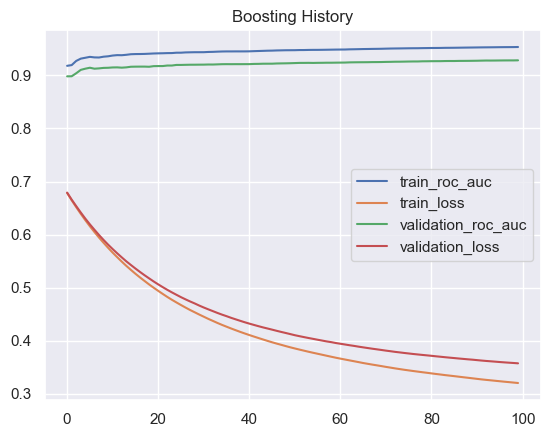

Train ROC-AUC 0.9536
Valid ROC-AUC 0.9285
Test ROC-AUC 0.9286


In [17]:
boosting = Boosting(
    early_stopping_rounds=10,
    n_estimators=100,
    base_model_params={'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5},
    bagging_temperature=1.0,
    bootstrap_type='Bernoulli',
    quantization_type=None,
)

boosting.fit(X_train, y_train, X_val, y_val)
boosting.plot_history()

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_val, y_val):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

Покажите, какие признаки оказались самыми важными

In [18]:
import pandas as pd

pd.DataFrame.sparse.from_spmatrix(X).columns[pd.Series(boosting.feature_importances_).sort_values(ascending=False).index[:10]]

Index([166, 164, 168, 158, 165, 142, 36, 71, 161, 163], dtype='int64')

### Бонус. DART (1.5 балла)

Ранее мы обсуждали, что каждый базовый алгоритм пытается исправить ошибки всего предыдущего ансамбля. Из-за этого возникает неравноправие — каждая новая модель вносит все меньший и меньший вклад. Уверенные обучатели нейросетей знают, что это может привести к переобучению. Но выход есть, и выход этот [DART](https://arxiv.org/pdf/1505.01866)!

В DL есть такой вид регуляризации, как dropout, когда некоторые узлы нейросети со случайным шансом отключаются. Можно попробовать обобщить этот подход на случай бустингов и случайно выкидывать деревья из композиции во время обучения

1. Выбираем, какие деревья убрать. При подсчете антиградиента берем не весь ансамбль, а только ту часть, что осталась
2. Домножаем выходы дерева на $1/k$, где $k$ — число удаленных деревьев, чтобы учесть тот факт, что ансамбль был не весь. Тогда вклад отдельного дерева будет не настолько большим
3. Домножаем выходы выкинутых деревьев на $k/(k+1)$, чтобы масштабы выходов примерно совпадали

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="dart")` | `LGBMClassifier(boosting_type="dart")` | — |

Параметры, которые нужно добавить:

- `dart: bool | None = False` — DART бустинг или нет
- `dropout_rate: int | float = 0.05` — доля деревьев, которую выкидываем во время обучения DART

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

------

## Задание 3. Оптимизация (3.5 балла + 0.5 бонус)

Теперь давайте подумаем, как же правильно применять бустинги. Нас интересует: какие бустинги вообще бывают, как их правильно тюнить, и как интерпретировать

Оптимизация моделей с большим числом гиперпараметров это сложное дело. Нетрудно догадаться, что в случае, когда параметров $m$, сложность перебора в самом худшем случае будет порядка $n^m$. У бустингов, хотя на самом деле не только, эта проблема стоит особенно остро. Подумаем, как это делать умнее

### 3.1. Знакомство с optuna (1 балл)

Для эффективного подбора гиперпараметров существует несколько решений, основанных на байесовской оптимизации. В этом задании предлагается познакомиться с библиотекой [optuna](https://optuna.org/), которая делает перебор гиперпараметров легким и приятным, а также сохраняет всю историю экспериментов в одно место за вас

Подберите на валидации оптимальные значения следующих гиперпараметров для вашей реализации бустинга:
- `max_depth`
- `n_estimators`
- `learning_rate`
- любые другие параметры, которые вам понравились

Заметим, что оптуна это крайне гибкая библиотека, в которой можно реализовать абсолютно любую логику, которую пожелаете. За вас там есть лишь выбор модели. Чтобы не плодить несколько `objective`, можно слегка менять тело функции, например, добавить опциональные параметры, но шаблоном пользоваться не обязательно, как обычно

Подберите диапазон параметров самостоятельно, не забывайте фиксировать сид (нет, его не нужно перебирать). Сохраните и покажите оптимальный набор параметров. Сравните графики функций потерь для оптимального и дефолтного бустингов. Покажите, какие параметры дали наибольший прирост (для этого придется почитать документацию оптуны)

In [7]:
import optuna

In [ ]:
def objective(trial):
    # параметры, общие для всех бустингов
    common_params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 200),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 100)
        }
    # параметры для конкретной имплементации бустинга
    optional_params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-2, 5e-1),
        'n_estimators': trial.suggest_int('n_estimators', 80, 150),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.1, 1.0),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bernoulli', 'Bayesian']),
        'rsm': trial.suggest_float('rsm', 0.5, 1.0),
        'quantization_type': trial.suggest_categorical('quantization_type', [None, 'uniform', 'quantile']),
        'nbins': trial.suggest_int('nbins', 32, 128)
    }
    boosting = Boosting(
        early_stopping_rounds=10,
        base_model_params=common_params,
        **optional_params
    )
    boosting.fit(X_train, y_train, X_val, y_val)
    return boosting.score(X_val, y_val)

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=20)

[I 2025-05-26 23:35:40,480] A new study created in memory with name: no-name-562c4ffa-d0c9-4f30-a5b5-76a2752ee5fa


10/121, ROC AUC: 0.9627, Loss: 0.6468, Time: 3.05
20/121, ROC AUC: 0.9637, Loss: 0.6109, Time: 3.93
30/121, ROC AUC: 0.9642, Loss: 0.5785, Time: 5.27
40/121, ROC AUC: 0.9645, Loss: 0.5496, Time: 6.65


[I 2025-05-26 23:36:01,701] Trial 0 finished with value: 0.9343906969244903 and parameters: {'max_depth': 8, 'min_samples_split': 136, 'min_samples_leaf': 34, 'learning_rate': 0.02616352118095068, 'n_estimators': 121, 'bagging_temperature': 0.3517236215012376, 'bootstrap_type': 'Bayesian', 'rsm': 0.937559153869503, 'quantization_type': 'uniform', 'nbins': 113}. Best is trial 0 with value: 0.9343906969244903.


Early stopping at iteration 43, best model depth: 34
10/110, ROC AUC: 0.9677, Loss: 0.5225, Time: 2.23
20/110, ROC AUC: 0.9696, Loss: 0.4359, Time: 3.37
30/110, ROC AUC: 0.9708, Loss: 0.3784, Time: 4.88
40/110, ROC AUC: 0.9720, Loss: 0.3420, Time: 6.14
50/110, ROC AUC: 0.9729, Loss: 0.3143, Time: 7.55
60/110, ROC AUC: 0.9738, Loss: 0.2943, Time: 8.86
70/110, ROC AUC: 0.9745, Loss: 0.2781, Time: 10.12
80/110, ROC AUC: 0.9752, Loss: 0.2662, Time: 11.46
90/110, ROC AUC: 0.9758, Loss: 0.2558, Time: 13.05
100/110, ROC AUC: 0.9764, Loss: 0.2472, Time: 14.05


[I 2025-05-26 23:37:37,315] Trial 1 finished with value: 0.9409701851723254 and parameters: {'max_depth': 9, 'min_samples_split': 49, 'min_samples_leaf': 42, 'learning_rate': 0.12190018548336186, 'n_estimators': 110, 'bagging_temperature': 0.7883103591448792, 'bootstrap_type': 'Bayesian', 'rsm': 0.9036952677276011, 'quantization_type': None, 'nbins': 37}. Best is trial 1 with value: 0.9409701851723254.


10/103, ROC AUC: 0.9658, Loss: 0.3894, Time: 2.45
20/103, ROC AUC: 0.9691, Loss: 0.3137, Time: 3.44
30/103, ROC AUC: 0.9709, Loss: 0.2749, Time: 4.52
40/103, ROC AUC: 0.9722, Loss: 0.2528, Time: 5.68
50/103, ROC AUC: 0.9731, Loss: 0.2395, Time: 7.04


[I 2025-05-26 23:38:05,874] Trial 2 finished with value: 0.941173723872216 and parameters: {'max_depth': 8, 'min_samples_split': 71, 'min_samples_leaf': 81, 'learning_rate': 0.3678791741269263, 'n_estimators': 103, 'bagging_temperature': 0.6325247461743592, 'bootstrap_type': 'Bayesian', 'rsm': 0.7470025699904799, 'quantization_type': 'uniform', 'nbins': 107}. Best is trial 2 with value: 0.941173723872216.


Early stopping at iteration 57, best model depth: 48
10/112, ROC AUC: 0.9588, Loss: 0.6599, Time: 1.69
20/112, ROC AUC: 0.9603, Loss: 0.6352, Time: 2.68


[I 2025-05-26 23:38:12,803] Trial 3 finished with value: 0.9321709278092133 and parameters: {'max_depth': 6, 'min_samples_split': 140, 'min_samples_leaf': 80, 'learning_rate': 0.021194846681330964, 'n_estimators': 112, 'bagging_temperature': 0.96903192791924, 'bootstrap_type': 'Bernoulli', 'rsm': 0.7074882299593312, 'quantization_type': None, 'nbins': 118}. Best is trial 2 with value: 0.941173723872216.


Early stopping at iteration 27, best model depth: 18
10/129, ROC AUC: 0.9627, Loss: 0.6578, Time: 2.47
20/129, ROC AUC: 0.9649, Loss: 0.6296, Time: 3.43


[I 2025-05-26 23:38:19,530] Trial 4 finished with value: 0.9375950346135519 and parameters: {'max_depth': 9, 'min_samples_split': 41, 'min_samples_leaf': 71, 'learning_rate': 0.02164927670432224, 'n_estimators': 129, 'bagging_temperature': 0.6780444692747701, 'bootstrap_type': 'Bayesian', 'rsm': 0.7554481728581264, 'quantization_type': 'uniform', 'nbins': 57}. Best is trial 2 with value: 0.941173723872216.


Early stopping at iteration 22, best model depth: 13
10/114, ROC AUC: 0.9439, Loss: 0.6295, Time: 1.79
20/114, ROC AUC: 0.9515, Loss: 0.5832, Time: 2.48
30/114, ROC AUC: 0.9544, Loss: 0.5460, Time: 3.33
40/114, ROC AUC: 0.9561, Loss: 0.5151, Time: 4.19
50/114, ROC AUC: 0.9567, Loss: 0.4920, Time: 5.07
60/114, ROC AUC: 0.9574, Loss: 0.4724, Time: 6.07
70/114, ROC AUC: 0.9580, Loss: 0.4523, Time: 6.92
80/114, ROC AUC: 0.9588, Loss: 0.4366, Time: 7.82


[I 2025-05-26 23:39:04,073] Trial 5 finished with value: 0.9328198570759231 and parameters: {'max_depth': 4, 'min_samples_split': 199, 'min_samples_leaf': 40, 'learning_rate': 0.04955989531641226, 'n_estimators': 114, 'bagging_temperature': 0.8425279121778019, 'bootstrap_type': 'Bernoulli', 'rsm': 0.5566828043284698, 'quantization_type': 'quantile', 'nbins': 83}. Best is trial 2 with value: 0.941173723872216.


Early stopping at iteration 88, best model depth: 79
10/129, ROC AUC: 0.9547, Loss: 0.6639, Time: 1.95
20/129, ROC AUC: 0.9573, Loss: 0.6410, Time: 2.74
30/129, ROC AUC: 0.9581, Loss: 0.6198, Time: 3.76
40/129, ROC AUC: 0.9585, Loss: 0.6011, Time: 4.75


[I 2025-05-26 23:39:20,687] Trial 6 finished with value: 0.9325420866148959 and parameters: {'max_depth': 5, 'min_samples_split': 77, 'min_samples_leaf': 97, 'learning_rate': 0.019652708384855114, 'n_estimators': 129, 'bagging_temperature': 0.8074605883213063, 'bootstrap_type': 'Bayesian', 'rsm': 0.6594002876046128, 'quantization_type': 'quantile', 'nbins': 98}. Best is trial 2 with value: 0.941173723872216.


Early stopping at iteration 46, best model depth: 37
10/114, ROC AUC: 0.9526, Loss: 0.4965, Time: 2.27
20/114, ROC AUC: 0.9557, Loss: 0.4127, Time: 3.23
30/114, ROC AUC: 0.9579, Loss: 0.3637, Time: 4.32
40/114, ROC AUC: 0.9602, Loss: 0.3364, Time: 5.44
50/114, ROC AUC: 0.9617, Loss: 0.3153, Time: 6.56
60/114, ROC AUC: 0.9629, Loss: 0.3000, Time: 7.56
70/114, ROC AUC: 0.9639, Loss: 0.2872, Time: 8.80
80/114, ROC AUC: 0.9649, Loss: 0.2781, Time: 9.53
90/114, ROC AUC: 0.9657, Loss: 0.2704, Time: 10.70
100/114, ROC AUC: 0.9665, Loss: 0.2639, Time: 11.66
110/114, ROC AUC: 0.9671, Loss: 0.2582, Time: 12.81


[I 2025-05-26 23:40:47,686] Trial 7 finished with value: 0.9386725924365019 and parameters: {'max_depth': 4, 'min_samples_split': 181, 'min_samples_leaf': 4, 'learning_rate': 0.1861906876600295, 'n_estimators': 114, 'bagging_temperature': 0.6246081964215087, 'bootstrap_type': 'Bernoulli', 'rsm': 0.734944979087248, 'quantization_type': 'uniform', 'nbins': 80}. Best is trial 2 with value: 0.941173723872216.


10/127, ROC AUC: 0.9488, Loss: 0.4470, Time: 1.25
20/127, ROC AUC: 0.9548, Loss: 0.3663, Time: 2.11
30/127, ROC AUC: 0.9578, Loss: 0.3315, Time: 2.81
40/127, ROC AUC: 0.9599, Loss: 0.3060, Time: 3.60
50/127, ROC AUC: 0.9617, Loss: 0.2899, Time: 4.40
60/127, ROC AUC: 0.9634, Loss: 0.2774, Time: 5.23
70/127, ROC AUC: 0.9644, Loss: 0.2662, Time: 6.05
80/127, ROC AUC: 0.9656, Loss: 0.2583, Time: 6.75
90/127, ROC AUC: 0.9667, Loss: 0.2527, Time: 7.57
100/127, ROC AUC: 0.9672, Loss: 0.2467, Time: 8.42
110/127, ROC AUC: 0.9679, Loss: 0.2420, Time: 9.29
120/127, ROC AUC: 0.9685, Loss: 0.2383, Time: 9.91


[I 2025-05-26 23:42:01,524] Trial 8 finished with value: 0.9410408250740523 and parameters: {'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 8, 'learning_rate': 0.37950457096458395, 'n_estimators': 127, 'bagging_temperature': 0.21514389972176473, 'bootstrap_type': 'Bernoulli', 'rsm': 0.5073521706846871, 'quantization_type': None, 'nbins': 75}. Best is trial 2 with value: 0.941173723872216.


10/142, ROC AUC: 0.9441, Loss: 0.6792, Time: 1.97


[I 2025-05-26 23:42:04,585] Trial 9 finished with value: 0.9199977171737973 and parameters: {'max_depth': 3, 'min_samples_split': 81, 'min_samples_leaf': 40, 'learning_rate': 0.010445818367933487, 'n_estimators': 142, 'bagging_temperature': 0.8646947237440586, 'bootstrap_type': 'Bernoulli', 'rsm': 0.7512004217358914, 'quantization_type': 'quantile', 'nbins': 47}. Best is trial 2 with value: 0.941173723872216.


Early stopping at iteration 14, best model depth: 5
10/92, ROC AUC: 0.9624, Loss: 0.3954, Time: 2.59
20/92, ROC AUC: 0.9678, Loss: 0.3053, Time: 3.59
30/92, ROC AUC: 0.9703, Loss: 0.2683, Time: 4.73
40/92, ROC AUC: 0.9720, Loss: 0.2466, Time: 5.97
50/92, ROC AUC: 0.9732, Loss: 0.2343, Time: 7.18
60/92, ROC AUC: 0.9742, Loss: 0.2251, Time: 8.46
70/92, ROC AUC: 0.9749, Loss: 0.2181, Time: 9.72
80/92, ROC AUC: 0.9756, Loss: 0.2122, Time: 10.79
90/92, ROC AUC: 0.9763, Loss: 0.2074, Time: 12.07


[I 2025-05-26 23:43:11,097] Trial 10 finished with value: 0.9422436988808565 and parameters: {'max_depth': 7, 'min_samples_split': 118, 'min_samples_leaf': 66, 'learning_rate': 0.4003664937576365, 'n_estimators': 92, 'bagging_temperature': 0.45094473353202724, 'bootstrap_type': 'Bayesian', 'rsm': 0.8239046285390297, 'quantization_type': 'uniform', 'nbins': 126}. Best is trial 10 with value: 0.9422436988808565.


10/88, ROC AUC: 0.9663, Loss: 0.3719, Time: 2.64
20/88, ROC AUC: 0.9690, Loss: 0.2928, Time: 3.73
30/88, ROC AUC: 0.9711, Loss: 0.2605, Time: 5.00
40/88, ROC AUC: 0.9729, Loss: 0.2406, Time: 6.17
50/88, ROC AUC: 0.9739, Loss: 0.2288, Time: 7.40
60/88, ROC AUC: 0.9748, Loss: 0.2202, Time: 8.65
70/88, ROC AUC: 0.9756, Loss: 0.2133, Time: 9.69
80/88, ROC AUC: 0.9762, Loss: 0.2077, Time: 10.95


[I 2025-05-26 23:44:13,821] Trial 11 finished with value: 0.9420804688254539 and parameters: {'max_depth': 7, 'min_samples_split': 120, 'min_samples_leaf': 67, 'learning_rate': 0.4475491808208621, 'n_estimators': 88, 'bagging_temperature': 0.4419805514519093, 'bootstrap_type': 'Bayesian', 'rsm': 0.8370851234840537, 'quantization_type': 'uniform', 'nbins': 128}. Best is trial 10 with value: 0.9422436988808565.


10/82, ROC AUC: 0.9656, Loss: 0.3410, Time: 2.72
20/82, ROC AUC: 0.9693, Loss: 0.2747, Time: 3.70
30/82, ROC AUC: 0.9721, Loss: 0.2464, Time: 5.05
40/82, ROC AUC: 0.9735, Loss: 0.2301, Time: 6.34
50/82, ROC AUC: 0.9749, Loss: 0.2192, Time: 7.57
60/82, ROC AUC: 0.9759, Loss: 0.2115, Time: 8.64
70/82, ROC AUC: 0.9767, Loss: 0.2054, Time: 9.89
80/82, ROC AUC: 0.9773, Loss: 0.2009, Time: 11.08


[I 2025-05-26 23:45:10,105] Trial 12 finished with value: 0.94281719909996 and parameters: {'max_depth': 7, 'min_samples_split': 128, 'min_samples_leaf': 60, 'learning_rate': 0.4955567251220977, 'n_estimators': 82, 'bagging_temperature': 0.3892686755730589, 'bootstrap_type': 'Bayesian', 'rsm': 0.8520663805727804, 'quantization_type': 'uniform', 'nbins': 128}. Best is trial 12 with value: 0.94281719909996.


10/80, ROC AUC: 0.9615, Loss: 0.4747, Time: 2.55
20/80, ROC AUC: 0.9635, Loss: 0.3861, Time: 3.76
30/80, ROC AUC: 0.9652, Loss: 0.3380, Time: 5.10
40/80, ROC AUC: 0.9664, Loss: 0.3085, Time: 6.23
50/80, ROC AUC: 0.9676, Loss: 0.2876, Time: 7.46
60/80, ROC AUC: 0.9686, Loss: 0.2731, Time: 8.53
70/80, ROC AUC: 0.9696, Loss: 0.2613, Time: 9.79


[I 2025-05-26 23:46:03,470] Trial 13 finished with value: 0.9402138992188106 and parameters: {'max_depth': 6, 'min_samples_split': 161, 'min_samples_leaf': 55, 'learning_rate': 0.19759484280586384, 'n_estimators': 80, 'bagging_temperature': 0.10705174557400077, 'bootstrap_type': 'Bayesian', 'rsm': 0.8500376810883867, 'quantization_type': 'uniform', 'nbins': 128}. Best is trial 12 with value: 0.94281719909996.


10/95, ROC AUC: 0.9666, Loss: 0.4383, Time: 2.99
20/95, ROC AUC: 0.9687, Loss: 0.3490, Time: 4.29
30/95, ROC AUC: 0.9710, Loss: 0.3027, Time: 5.71
40/95, ROC AUC: 0.9726, Loss: 0.2756, Time: 7.16
50/95, ROC AUC: 0.9740, Loss: 0.2562, Time: 8.65
60/95, ROC AUC: 0.9751, Loss: 0.2424, Time: 9.90


[I 2025-05-26 23:46:46,760] Trial 14 finished with value: 0.9401300891659143 and parameters: {'max_depth': 10, 'min_samples_split': 106, 'min_samples_leaf': 58, 'learning_rate': 0.22155716994181618, 'n_estimators': 95, 'bagging_temperature': 0.4564371793224357, 'bootstrap_type': 'Bayesian', 'rsm': 0.9749349981973767, 'quantization_type': 'uniform', 'nbins': 98}. Best is trial 12 with value: 0.94281719909996.


Early stopping at iteration 64, best model depth: 55
10/80, ROC AUC: 0.9629, Loss: 0.5903, Time: 2.68
20/80, ROC AUC: 0.9651, Loss: 0.5215, Time: 3.82
30/80, ROC AUC: 0.9658, Loss: 0.4656, Time: 4.81
40/80, ROC AUC: 0.9665, Loss: 0.4248, Time: 6.30
50/80, ROC AUC: 0.9672, Loss: 0.3945, Time: 7.58
60/80, ROC AUC: 0.9680, Loss: 0.3713, Time: 8.64
70/80, ROC AUC: 0.9686, Loss: 0.3516, Time: 9.82


[I 2025-05-26 23:47:40,510] Trial 15 finished with value: 0.9386043471077149 and parameters: {'max_depth': 7, 'min_samples_split': 152, 'min_samples_leaf': 24, 'learning_rate': 0.0717375706795875, 'n_estimators': 80, 'bagging_temperature': 0.3514898897892161, 'bootstrap_type': 'Bayesian', 'rsm': 0.8452764263882138, 'quantization_type': 'uniform', 'nbins': 98}. Best is trial 12 with value: 0.94281719909996.


10/94, ROC AUC: 0.9634, Loss: 0.4117, Time: 2.62
20/94, ROC AUC: 0.9657, Loss: 0.3280, Time: 3.79
30/94, ROC AUC: 0.9683, Loss: 0.2887, Time: 4.85
40/94, ROC AUC: 0.9700, Loss: 0.2660, Time: 6.12
50/94, ROC AUC: 0.9711, Loss: 0.2512, Time: 7.31
60/94, ROC AUC: 0.9722, Loss: 0.2400, Time: 8.51
70/94, ROC AUC: 0.9730, Loss: 0.2321, Time: 9.74
80/94, ROC AUC: 0.9737, Loss: 0.2252, Time: 10.87
90/94, ROC AUC: 0.9743, Loss: 0.2201, Time: 12.16


[I 2025-05-26 23:48:50,478] Trial 16 finished with value: 0.9417288656987803 and parameters: {'max_depth': 8, 'min_samples_split': 112, 'min_samples_leaf': 97, 'learning_rate': 0.290716581712832, 'n_estimators': 94, 'bagging_temperature': 0.5315989022840282, 'bootstrap_type': 'Bayesian', 'rsm': 0.8256910945747181, 'quantization_type': 'uniform', 'nbins': 119}. Best is trial 12 with value: 0.94281719909996.


10/91, ROC AUC: 0.9534, Loss: 0.5318, Time: 2.51
20/91, ROC AUC: 0.9557, Loss: 0.4495, Time: 3.69
30/91, ROC AUC: 0.9581, Loss: 0.3984, Time: 4.96
40/91, ROC AUC: 0.9599, Loss: 0.3642, Time: 6.40
50/91, ROC AUC: 0.9609, Loss: 0.3398, Time: 7.60
60/91, ROC AUC: 0.9620, Loss: 0.3210, Time: 9.07
70/91, ROC AUC: 0.9629, Loss: 0.3070, Time: 10.06
80/91, ROC AUC: 0.9638, Loss: 0.2953, Time: 11.35


[I 2025-05-26 23:49:58,824] Trial 17 finished with value: 0.9364332676422156 and parameters: {'max_depth': 5, 'min_samples_split': 127, 'min_samples_leaf': 64, 'learning_rate': 0.12332314702018353, 'n_estimators': 91, 'bagging_temperature': 0.28363283371965164, 'bootstrap_type': 'Bayesian', 'rsm': 0.8973395158164096, 'quantization_type': 'uniform', 'nbins': 65}. Best is trial 12 with value: 0.94281719909996.


90/91, ROC AUC: 0.9644, Loss: 0.2860, Time: 12.59
10/102, ROC AUC: 0.9617, Loss: 0.5548, Time: 1.66
20/102, ROC AUC: 0.9627, Loss: 0.4756, Time: 2.57
30/102, ROC AUC: 0.9648, Loss: 0.4254, Time: 3.63
40/102, ROC AUC: 0.9655, Loss: 0.3851, Time: 4.85
50/102, ROC AUC: 0.9664, Loss: 0.3567, Time: 5.76
60/102, ROC AUC: 0.9673, Loss: 0.3366, Time: 6.83
70/102, ROC AUC: 0.9681, Loss: 0.3218, Time: 7.89
80/102, ROC AUC: 0.9687, Loss: 0.3097, Time: 8.90
90/102, ROC AUC: 0.9691, Loss: 0.2975, Time: 9.89
100/102, ROC AUC: 0.9696, Loss: 0.2877, Time: 11.09


[I 2025-05-26 23:51:03,114] Trial 18 finished with value: 0.940570690586854 and parameters: {'max_depth': 7, 'min_samples_split': 94, 'min_samples_leaf': 80, 'learning_rate': 0.10480541319951073, 'n_estimators': 102, 'bagging_temperature': 0.503143779867038, 'bootstrap_type': 'Bayesian', 'rsm': 0.6582833288193688, 'quantization_type': None, 'nbins': 88}. Best is trial 12 with value: 0.94281719909996.


10/86, ROC AUC: 0.9626, Loss: 0.3406, Time: 2.58
20/86, ROC AUC: 0.9675, Loss: 0.2780, Time: 3.89
30/86, ROC AUC: 0.9701, Loss: 0.2509, Time: 5.33
40/86, ROC AUC: 0.9717, Loss: 0.2354, Time: 6.74
50/86, ROC AUC: 0.9732, Loss: 0.2251, Time: 8.27
60/86, ROC AUC: 0.9743, Loss: 0.2172, Time: 9.51
70/86, ROC AUC: 0.9752, Loss: 0.2113, Time: 10.99
80/86, ROC AUC: 0.9761, Loss: 0.2060, Time: 12.37


[I 2025-05-26 23:52:09,568] Trial 19 finished with value: 0.9423921624031294 and parameters: {'max_depth': 6, 'min_samples_split': 176, 'min_samples_leaf': 52, 'learning_rate': 0.4970473275558212, 'n_estimators': 86, 'bagging_temperature': 0.18890800096901367, 'bootstrap_type': 'Bayesian', 'rsm': 0.9914308465127428, 'quantization_type': 'quantile', 'nbins': 106}. Best is trial 12 with value: 0.94281719909996.


Best params: {'max_depth': 7, 'min_samples_split': 128, 'min_samples_leaf': 60, 'learning_rate': 0.4955567251220977, 'n_estimators': 82, 'bagging_temperature': 0.3892686755730589, 'bootstrap_type': 'Bayesian', 'rsm': 0.8520663805727804, 'quantization_type': 'uniform', 'nbins': 128}
Best validation ROC AUC: 0.94281719909996
Hyperparameter importances: {'learning_rate': np.float64(0.3980827702410114), 'bagging_temperature': np.float64(0.23419374919222155), 'n_estimators': np.float64(0.1652558898955015), 'max_depth': np.float64(0.11094041126734427), 'quantization_type': np.float64(0.044348514347173955), 'nbins': np.float64(0.02479487801344436), 'rsm': np.float64(0.010600921882581065), 'min_samples_split': np.float64(0.0070137875214170385), 'min_samples_leaf': np.float64(0.003459181646764299), 'bootstrap_type': np.float64(0.0013098959925407234)}
10/82, ROC AUC: 0.9664, Loss: 0.3427, Time: 2.55
20/82, ROC AUC: 0.9705, Loss: 0.2756, Time: 3.64
30/82, ROC AUC: 0.9723, Loss: 0.2472, Time: 4.99

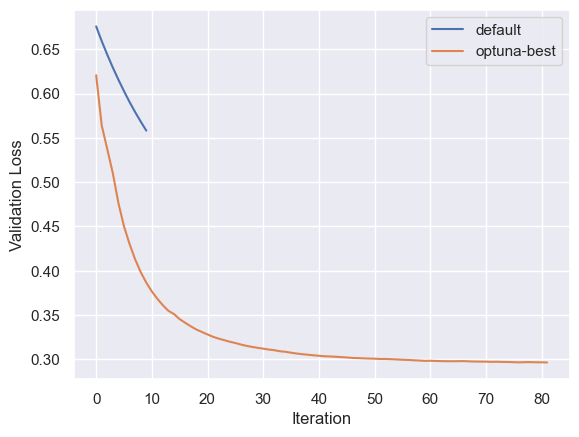

In [14]:
print("Best params:", study.best_params)
print("Best validation ROC AUC:", study.best_value)

# 2. Важность гиперпараметров
from optuna.importance import get_param_importances

param_importances = get_param_importances(study)
print("Hyperparameter importances:", param_importances)

# 3. Сравнение loss-функции для дефолтного и оптимального бустинга
import matplotlib.pyplot as plt

# дефолтный бустинг
default_boost = Boosting(early_stopping_rounds=10)
default_boost.fit(X_train, y_train, X_val, y_val)
hist_def = default_boost.history["validation_loss"]

# бустинг с лучшими параметрами
base_model_params_best = {
    'max_depth': study.best_params['max_depth'],
    'min_samples_split': study.best_params['min_samples_split'],
    'min_samples_leaf': study.best_params['min_samples_leaf']
}
optional_params_best = {
    'learning_rate': study.best_params['learning_rate'],
    'n_estimators': study.best_params['n_estimators'],
    'bagging_temperature': study.best_params['bagging_temperature'],
    'bootstrap_type': study.best_params['bootstrap_type'],
    'rsm': study.best_params['rsm'],
    'quantization_type': study.best_params['quantization_type'],
    'nbins': study.best_params['nbins']
}
best_boost = Boosting(early_stopping_rounds=10, base_model_params=base_model_params_best, **optional_params_best)
best_boost.fit(X_train, y_train, X_val, y_val)
hist_best = best_boost.history["validation_loss"]

plt.plot(hist_def, label="default")
plt.plot(hist_best, label="optuna-best")
plt.xlabel("Iteration")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()


### 3.2. Глубокая оптимизация (1 балл)

Помимо эффективного перебора гиперпараметров, `optuna` предлагает более тонкий контроль над самой процедурой обучения. Улучшите процедуру оптимизации следующим образом:

1. Посмотрите, как в `optuna` устроена запись в хранилища, и добавьте это в пайплайн оптимизации. Без указания БД все запуски оптуны сотрутся, как только закончится сессия. Более того, так можно распараллелить процесс оптимизации на несколько машин
2. Посмотрите, как можно контролировать процесс обучения бустинга при помощи прунера. У библиотечных имплементаций есть уже готовые, их можно использовать пунктом ниже. Для кастомной модели возьмите что-то из `optuna.pruners`. Идея прунера — не обучать бустинг до конца, если по истории видно, что другие бустинги на этом этапе статистически лучше.
3. Добавьте сохранение истории функции потерь и времени обучения в качестве `user_attribute` сразу в `study`. Мы не хотим оптимизировать их напрямую, но они нам понадобится для сравнения моделей в дальнейшем

Добавьте хранилище и юзер атрибуты и посмотрите, ускорилась ли оптимизация с добавлением прунера

In [22]:
from datetime import datetime
import optuna
import os

def objective(trial):

    time_then = datetime.now()
    common_params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 200),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 100)
        }
    optional_params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-2, 2.0),
        'n_estimators': trial.suggest_int('n_estimators', 80, 150),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.1, 1.0),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bernoulli', 'Bayesian']),
        'rsm': trial.suggest_float('rsm', 0.5, 1.0),
        'quantization_type': trial.suggest_categorical('quantization_type', [None, 'uniform', 'quantile']),
        'nbins': trial.suggest_int('nbins', 32, 128)
    }
        
    boosting = Boosting(
        early_stopping_rounds=10,
        base_model_params=common_params,
        **optional_params
    )
    boosting.fit(X_train, y_train, X_val, y_val, trial=trial)

    trial.set_user_attr('time', (datetime.now() - time_then).total_seconds())
    trial.set_user_attr('loss_history', boosting.history['validation_loss'])
    trial.set_user_attr('roc_history', boosting.history['validation_roc_auc'])

    return boosting.score(X_val, y_val)

study = optuna.create_study(
    storage=f'sqlite:///{os.path.join(os.getcwd(), "optuna_study.db")}',
    load_if_exists=True,
    study_name='boosting_optimization',
    pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=30, interval_steps=1),
    direction='maximize', sampler=optuna.samplers.TPESampler(seed=42)
    )
study.optimize(objective, n_trials=50)

[I 2025-05-27 00:54:06,876] A new study created in RDB with name: boosting_optimization


10/91, ROC AUC: 0.9584, Loss: 0.4576, Time: 2.32
20/91, ROC AUC: 0.9606, Loss: 0.3704, Time: 3.22
30/91, ROC AUC: 0.9624, Loss: 0.3248, Time: 4.69
40/91, ROC AUC: 0.9641, Loss: 0.2995, Time: 5.87
50/91, ROC AUC: 0.9654, Loss: 0.2831, Time: 7.34
60/91, ROC AUC: 0.9664, Loss: 0.2694, Time: 8.07
70/91, ROC AUC: 0.9673, Loss: 0.2602, Time: 9.16
80/91, ROC AUC: 0.9682, Loss: 0.2521, Time: 10.57


[I 2025-05-27 00:55:09,567] Trial 0 finished with value: 0.9393614312522099 and parameters: {'max_depth': 5, 'min_samples_split': 191, 'min_samples_leaf': 74, 'learning_rate': 0.2385234757844708, 'n_estimators': 91, 'bagging_temperature': 0.2403950683025824, 'bootstrap_type': 'Bayesian', 'rsm': 0.8005575058716043, 'quantization_type': 'quantile', 'nbins': 112}. Best is trial 0 with value: 0.9393614312522099.


90/91, ROC AUC: 0.9690, Loss: 0.2460, Time: 11.32
10/117, ROC AUC: 0.9516, Loss: 0.6341, Time: 1.78


[I 2025-05-27 00:55:13,625] Trial 1 finished with value: 0.9267057141694065 and parameters: {'max_depth': 4, 'min_samples_split': 38, 'min_samples_leaf': 19, 'learning_rate': 0.05012686302434878, 'n_estimators': 117, 'bagging_temperature': 0.4887505167779042, 'bootstrap_type': 'Bayesian', 'rsm': 0.569746930326021, 'quantization_type': 'quantile', 'nbins': 108}. Best is trial 0 with value: 0.9393614312522099.


Early stopping at iteration 19, best model depth: 10
10/123, ROC AUC: 0.9411, Loss: 0.6720, Time: 2.07
20/123, ROC AUC: 0.9437, Loss: 0.6542, Time: 3.34
30/123, ROC AUC: 0.9444, Loss: 0.6372, Time: 4.84
40/123, ROC AUC: 0.9443, Loss: 0.6213, Time: 6.30
50/123, ROC AUC: 0.9450, Loss: 0.6064, Time: 7.80
60/123, ROC AUC: 0.9452, Loss: 0.5923, Time: 9.11
70/123, ROC AUC: 0.9455, Loss: 0.5790, Time: 10.47
80/123, ROC AUC: 0.9460, Loss: 0.5664, Time: 11.87
90/123, ROC AUC: 0.9464, Loss: 0.5545, Time: 13.33
100/123, ROC AUC: 0.9468, Loss: 0.5433, Time: 14.78
110/123, ROC AUC: 0.9474, Loss: 0.5327, Time: 16.18
120/123, ROC AUC: 0.9480, Loss: 0.5226, Time: 17.54


[I 2025-05-27 00:57:15,339] Trial 2 finished with value: 0.923114253855063 and parameters: {'max_depth': 4, 'min_samples_split': 104, 'min_samples_leaf': 60, 'learning_rate': 0.012790390175145836, 'n_estimators': 123, 'bagging_temperature': 0.2534717113185624, 'bootstrap_type': 'Bayesian', 'rsm': 0.9828160165372797, 'quantization_type': None, 'nbins': 98}. Best is trial 0 with value: 0.9393614312522099.


10/144, ROC AUC: 0.9592, Loss: 0.6748, Time: 2.15


[I 2025-05-27 00:57:19,662] Trial 3 finished with value: 0.9324686530447395 and parameters: {'max_depth': 6, 'min_samples_split': 26, 'min_samples_leaf': 50, 'learning_rate': 0.011998556988857207, 'n_estimators': 144, 'bagging_temperature': 0.33290198344001526, 'bootstrap_type': 'Bernoulli', 'rsm': 0.7600340105889054, 'quantization_type': 'quantile', 'nbins': 107}. Best is trial 0 with value: 0.9393614312522099.


Early stopping at iteration 17, best model depth: 8
10/86, ROC AUC: 0.9724, Loss: 0.2538, Time: 2.44
20/86, ROC AUC: 0.9761, Loss: 0.2156, Time: 3.29
30/86, ROC AUC: 0.9783, Loss: 0.1976, Time: 4.25
40/86, ROC AUC: 0.9799, Loss: 0.1870, Time: 5.42
50/86, ROC AUC: 0.9809, Loss: 0.1800, Time: 6.57


[I 2025-05-27 00:57:45,332] Trial 4 finished with value: 0.9440887173310409 and parameters: {'max_depth': 10, 'min_samples_split': 180, 'min_samples_leaf': 60, 'learning_rate': 1.3220877067405616, 'n_estimators': 86, 'bagging_temperature': 0.27638457617723067, 'bootstrap_type': 'Bayesian', 'rsm': 0.6943386448447411, 'quantization_type': 'uniform', 'nbins': 59}. Best is trial 4 with value: 0.9440887173310409.


Early stopping at iteration 55, best model depth: 46
10/150, ROC AUC: 0.9588, Loss: 0.6672, Time: 2.45
20/150, ROC AUC: 0.9593, Loss: 0.6451, Time: 3.63


[I 2025-05-27 00:57:56,490] Trial 5 pruned. 


10/103, ROC AUC: 0.9583, Loss: 0.4380, Time: 2.46
20/103, ROC AUC: 0.9611, Loss: 0.3542, Time: 3.58
30/103, ROC AUC: 0.9630, Loss: 0.3123, Time: 4.73
40/103, ROC AUC: 0.9646, Loss: 0.2878, Time: 6.02
50/103, ROC AUC: 0.9656, Loss: 0.2722, Time: 7.28
60/103, ROC AUC: 0.9666, Loss: 0.2614, Time: 8.55
70/103, ROC AUC: 0.9674, Loss: 0.2529, Time: 10.04
80/103, ROC AUC: 0.9682, Loss: 0.2461, Time: 11.01
90/103, ROC AUC: 0.9689, Loss: 0.2411, Time: 12.25
100/103, ROC AUC: 0.9696, Loss: 0.2363, Time: 13.50


[I 2025-05-27 00:59:18,892] Trial 6 finished with value: 0.941280681463531 and parameters: {'max_depth': 5, 'min_samples_split': 25, 'min_samples_leaf': 87, 'learning_rate': 0.27178637804725736, 'n_estimators': 103, 'bagging_temperature': 0.15720251525742127, 'bootstrap_type': 'Bayesian', 'rsm': 0.864803089169032, 'quantization_type': 'uniform', 'nbins': 43}. Best is trial 4 with value: 0.9440887173310409.


10/115, ROC AUC: 0.9680, Loss: 0.3485, Time: 2.11
20/115, ROC AUC: 0.9714, Loss: 0.2800, Time: 2.84
30/115, ROC AUC: 0.9737, Loss: 0.2461, Time: 3.63


[I 2025-05-27 00:59:30,620] Trial 7 finished with value: 0.9424663941642661 and parameters: {'max_depth': 8, 'min_samples_split': 153, 'min_samples_leaf': 57, 'learning_rate': 0.5943176207886526, 'n_estimators': 115, 'bagging_temperature': 0.5704595464437947, 'bootstrap_type': 'Bernoulli', 'rsm': 0.5539457134966522, 'quantization_type': 'uniform', 'nbins': 81}. Best is trial 4 with value: 0.9440887173310409.


Early stopping at iteration 37, best model depth: 28
10/96, ROC AUC: 0.9727, Loss: 0.3074, Time: 2.77
20/96, ROC AUC: 0.9766, Loss: 0.2453, Time: 3.95
30/96, ROC AUC: 0.9788, Loss: 0.2180, Time: 5.44
40/96, ROC AUC: 0.9803, Loss: 0.2021, Time: 7.91


[I 2025-05-27 00:59:57,420] Trial 8 finished with value: 0.9393813860267091 and parameters: {'max_depth': 10, 'min_samples_split': 51, 'min_samples_leaf': 42, 'learning_rate': 0.5477038995623799, 'n_estimators': 96, 'bagging_temperature': 0.1692819188459137, 'bootstrap_type': 'Bernoulli', 'rsm': 0.9648488261712865, 'quantization_type': 'quantile', 'nbins': 109}. Best is trial 4 with value: 0.9440887173310409.


Early stopping at iteration 48, best model depth: 39
10/143, ROC AUC: 0.9567, Loss: 0.3245, Time: 2.19
20/143, ROC AUC: 0.9627, Loss: 0.2752, Time: 3.08


[I 2025-05-27 01:00:06,805] Trial 9 pruned. 


10/81, ROC AUC: 0.9800, Loss: 0.2133, Time: 1.76
20/81, ROC AUC: 0.9846, Loss: 0.1753, Time: 2.77


[I 2025-05-27 01:00:12,424] Trial 10 finished with value: 0.937159621433982 and parameters: {'max_depth': 10, 'min_samples_split': 116, 'min_samples_leaf': 1, 'learning_rate': 1.5763398242280116, 'n_estimators': 81, 'bagging_temperature': 0.916898315754266, 'bootstrap_type': 'Bayesian', 'rsm': 0.6626799989856424, 'quantization_type': None, 'nbins': 54}. Best is trial 4 with value: 0.9440887173310409.


Early stopping at iteration 23, best model depth: 14
10/129, ROC AUC: 0.9714, Loss: 0.2429, Time: 2.04
20/129, ROC AUC: 0.9760, Loss: 0.2083, Time: 2.62
30/129, ROC AUC: 0.9782, Loss: 0.1933, Time: 3.46


[I 2025-05-27 01:00:23,109] Trial 11 finished with value: 0.9444886110120023 and parameters: {'max_depth': 8, 'min_samples_split': 150, 'min_samples_leaf': 34, 'learning_rate': 1.9425026627545554, 'n_estimators': 129, 'bagging_temperature': 0.6575805488202393, 'bootstrap_type': 'Bernoulli', 'rsm': 0.5032052771610099, 'quantization_type': 'uniform', 'nbins': 68}. Best is trial 11 with value: 0.9444886110120023.


Early stopping at iteration 36, best model depth: 27
10/130, ROC AUC: 0.9730, Loss: 0.2537, Time: 2.03
20/130, ROC AUC: 0.9769, Loss: 0.2098, Time: 2.68
30/130, ROC AUC: 0.9784, Loss: 0.1954, Time: 3.54
40/130, ROC AUC: 0.9794, Loss: 0.1894, Time: 4.30
50/130, ROC AUC: 0.9806, Loss: 0.1801, Time: 5.24
60/130, ROC AUC: 0.9813, Loss: 0.1761, Time: 5.96


[I 2025-05-27 01:00:48,871] Trial 12 finished with value: 0.9430610464443385 and parameters: {'max_depth': 9, 'min_samples_split': 139, 'min_samples_leaf': 32, 'learning_rate': 1.5972333331756159, 'n_estimators': 130, 'bagging_temperature': 0.6257531637227267, 'bootstrap_type': 'Bernoulli', 'rsm': 0.5073729258954913, 'quantization_type': 'uniform', 'nbins': 63}. Best is trial 11 with value: 0.9444886110120023.


Early stopping at iteration 63, best model depth: 54
10/131, ROC AUC: 0.9728, Loss: 0.2287, Time: 2.32
20/131, ROC AUC: 0.9767, Loss: 0.2025, Time: 3.04


[I 2025-05-27 01:00:57,930] Trial 13 finished with value: 0.9420924416901535 and parameters: {'max_depth': 8, 'min_samples_split': 163, 'min_samples_leaf': 28, 'learning_rate': 1.9630269779105545, 'n_estimators': 131, 'bagging_temperature': 0.7158491676455533, 'bootstrap_type': 'Bernoulli', 'rsm': 0.6279390160822119, 'quantization_type': 'uniform', 'nbins': 66}. Best is trial 11 with value: 0.9444886110120023.


Early stopping at iteration 29, best model depth: 20
10/109, ROC AUC: 0.9645, Loss: 0.5911, Time: 2.31


[I 2025-05-27 01:01:02,744] Trial 14 finished with value: 0.9356203101291234 and parameters: {'max_depth': 9, 'min_samples_split': 72, 'min_samples_leaf': 71, 'learning_rate': 0.07688164947878144, 'n_estimators': 109, 'bagging_temperature': 0.44645419165100886, 'bootstrap_type': 'Bayesian', 'rsm': 0.643954649732532, 'quantization_type': 'uniform', 'nbins': 70}. Best is trial 11 with value: 0.9444886110120023.


Early stopping at iteration 18, best model depth: 9
10/80, ROC AUC: 0.9650, Loss: 0.3250, Time: 2.03
20/80, ROC AUC: 0.9692, Loss: 0.2659, Time: 2.65
30/80, ROC AUC: 0.9715, Loss: 0.2395, Time: 3.47
40/80, ROC AUC: 0.9730, Loss: 0.2262, Time: 4.30
50/80, ROC AUC: 0.9740, Loss: 0.2174, Time: 5.16
60/80, ROC AUC: 0.9749, Loss: 0.2103, Time: 5.91
70/80, ROC AUC: 0.9756, Loss: 0.2050, Time: 6.68


[I 2025-05-27 01:01:39,691] Trial 15 finished with value: 0.9434445772102108 and parameters: {'max_depth': 8, 'min_samples_split': 128, 'min_samples_leaf': 100, 'learning_rate': 0.8113973719871701, 'n_estimators': 80, 'bagging_temperature': 0.6755216196437901, 'bootstrap_type': 'Bernoulli', 'rsm': 0.5018861750216916, 'quantization_type': 'uniform', 'nbins': 52}. Best is trial 11 with value: 0.9444886110120023.


10/132, ROC AUC: 0.9709, Loss: 0.4117, Time: 2.65
20/132, ROC AUC: 0.9747, Loss: 0.3283, Time: 3.68


[I 2025-05-27 01:01:51,014] Trial 16 pruned. 


10/93, ROC AUC: 0.9649, Loss: 0.5456, Time: 1.80
20/93, ROC AUC: 0.9670, Loss: 0.4759, Time: 2.71


[I 2025-05-27 01:01:59,554] Trial 17 pruned. 


10/106, ROC AUC: 0.9746, Loss: 0.2795, Time: 2.35
20/106, ROC AUC: 0.9799, Loss: 0.2172, Time: 3.03
30/106, ROC AUC: 0.9818, Loss: 0.1954, Time: 4.02
40/106, ROC AUC: 0.9827, Loss: 0.1841, Time: 4.87
50/106, ROC AUC: 0.9839, Loss: 0.1743, Time: 5.79


[I 2025-05-27 01:02:26,592] Trial 18 finished with value: 0.9430263251367101 and parameters: {'max_depth': 10, 'min_samples_split': 82, 'min_samples_leaf': 20, 'learning_rate': 1.056228088394169, 'n_estimators': 106, 'bagging_temperature': 0.5545340957741886, 'bootstrap_type': 'Bayesian', 'rsm': 0.6020914931801977, 'quantization_type': 'uniform', 'nbins': 75}. Best is trial 11 with value: 0.9444886110120023.


Early stopping at iteration 60, best model depth: 51
10/127, ROC AUC: 0.9670, Loss: 0.3893, Time: 2.50
20/127, ROC AUC: 0.9697, Loss: 0.3039, Time: 3.49


[I 2025-05-27 01:02:37,337] Trial 19 pruned. 


10/140, ROC AUC: 0.9612, Loss: 0.6494, Time: 1.53
20/140, ROC AUC: 0.9626, Loss: 0.6183, Time: 2.33


[I 2025-05-27 01:02:44,476] Trial 20 pruned. 


10/80, ROC AUC: 0.9614, Loss: 0.3231, Time: 2.04
20/80, ROC AUC: 0.9692, Loss: 0.2549, Time: 2.72


[I 2025-05-27 01:02:52,842] Trial 21 pruned. 


10/85, ROC AUC: 0.9661, Loss: 0.2948, Time: 2.00
20/85, ROC AUC: 0.9698, Loss: 0.2491, Time: 2.63


[I 2025-05-27 01:03:01,049] Trial 22 pruned. 


10/87, ROC AUC: 0.9692, Loss: 0.2402, Time: 2.10
20/87, ROC AUC: 0.9730, Loss: 0.2149, Time: 2.77
30/87, ROC AUC: 0.9754, Loss: 0.2014, Time: 3.65
40/87, ROC AUC: 0.9766, Loss: 0.1947, Time: 4.47


[I 2025-05-27 01:03:16,211] Trial 23 finished with value: 0.944366886887558 and parameters: {'max_depth': 7, 'min_samples_split': 119, 'min_samples_leaf': 89, 'learning_rate': 1.9686730299936057, 'n_estimators': 87, 'bagging_temperature': 0.5018264616505548, 'bootstrap_type': 'Bernoulli', 'rsm': 0.54844292865402, 'quantization_type': 'uniform', 'nbins': 61}. Best is trial 11 with value: 0.9444886110120023.


Early stopping at iteration 44, best model depth: 35
10/99, ROC AUC: 0.9695, Loss: 0.2406, Time: 2.17
20/99, ROC AUC: 0.9733, Loss: 0.2155, Time: 2.91
30/99, ROC AUC: 0.9754, Loss: 0.2015, Time: 3.98
40/99, ROC AUC: 0.9765, Loss: 0.1953, Time: 4.91
50/99, ROC AUC: 0.9775, Loss: 0.1897, Time: 5.71
60/99, ROC AUC: 0.9781, Loss: 0.1863, Time: 6.54


[I 2025-05-27 01:03:46,130] Trial 24 finished with value: 0.944387639853037 and parameters: {'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 89, 'learning_rate': 1.9407709187314608, 'n_estimators': 99, 'bagging_temperature': 0.4738544674222786, 'bootstrap_type': 'Bernoulli', 'rsm': 0.5842057200380679, 'quantization_type': 'uniform', 'nbins': 63}. Best is trial 11 with value: 0.9444886110120023.


Early stopping at iteration 65, best model depth: 56
10/97, ROC AUC: 0.9690, Loss: 0.2456, Time: 2.24
20/97, ROC AUC: 0.9734, Loss: 0.2151, Time: 2.95
30/97, ROC AUC: 0.9755, Loss: 0.2017, Time: 3.89


[I 2025-05-27 01:03:57,623] Trial 25 finished with value: 0.9430630419217886 and parameters: {'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 89, 'learning_rate': 1.9652810004556032, 'n_estimators': 97, 'bagging_temperature': 0.48159945768587076, 'bootstrap_type': 'Bernoulli', 'rsm': 0.5992930203766798, 'quantization_type': 'uniform', 'nbins': 73}. Best is trial 11 with value: 0.9444886110120023.


Early stopping at iteration 35, best model depth: 26
10/104, ROC AUC: 0.9617, Loss: 0.4023, Time: 2.04
20/104, ROC AUC: 0.9668, Loss: 0.3405, Time: 2.82


[I 2025-05-27 01:04:06,172] Trial 26 pruned. 


10/99, ROC AUC: 0.9677, Loss: 0.2684, Time: 2.20
20/99, ROC AUC: 0.9718, Loss: 0.2302, Time: 2.98


[I 2025-05-27 01:04:15,306] Trial 27 pruned. 


10/120, ROC AUC: 0.9474, Loss: 0.5176, Time: 1.34
20/120, ROC AUC: 0.9506, Loss: 0.4444, Time: 2.17


[I 2025-05-27 01:04:21,885] Trial 28 pruned. 


10/89, ROC AUC: 0.9604, Loss: 0.3525, Time: 2.21
20/89, ROC AUC: 0.9643, Loss: 0.2952, Time: 3.04


[I 2025-05-27 01:04:31,209] Trial 29 pruned. 


10/111, ROC AUC: 0.9579, Loss: 0.3460, Time: 1.86
20/111, ROC AUC: 0.9673, Loss: 0.2744, Time: 2.67


[I 2025-05-27 01:04:39,295] Trial 30 pruned. 


10/87, ROC AUC: 0.9719, Loss: 0.2452, Time: 2.25
20/87, ROC AUC: 0.9755, Loss: 0.2132, Time: 3.12
30/87, ROC AUC: 0.9772, Loss: 0.1999, Time: 4.07
40/87, ROC AUC: 0.9784, Loss: 0.1912, Time: 5.12


[I 2025-05-27 01:04:58,132] Trial 31 finished with value: 0.9441437925086584 and parameters: {'max_depth': 7, 'min_samples_split': 172, 'min_samples_leaf': 33, 'learning_rate': 1.3810829536817912, 'n_estimators': 87, 'bagging_temperature': 0.10128177842310626, 'bootstrap_type': 'Bayesian', 'rsm': 0.6885074506573033, 'quantization_type': 'uniform', 'nbins': 59}. Best is trial 11 with value: 0.9444886110120023.


Early stopping at iteration 47, best model depth: 38
10/91, ROC AUC: 0.9704, Loss: 0.2517, Time: 2.06
20/91, ROC AUC: 0.9743, Loss: 0.2183, Time: 2.68


[I 2025-05-27 01:05:06,653] Trial 32 pruned. 


10/86, ROC AUC: 0.9711, Loss: 0.2534, Time: 2.16
20/86, ROC AUC: 0.9760, Loss: 0.2138, Time: 3.12
30/86, ROC AUC: 0.9782, Loss: 0.1973, Time: 4.07


[I 2025-05-27 01:05:16,549] Trial 33 finished with value: 0.9437714364165057 and parameters: {'max_depth': 7, 'min_samples_split': 121, 'min_samples_leaf': 21, 'learning_rate': 1.3521937207611614, 'n_estimators': 86, 'bagging_temperature': 0.2031018308843064, 'bootstrap_type': 'Bayesian', 'rsm': 0.6295374226012092, 'quantization_type': 'uniform', 'nbins': 48}. Best is trial 11 with value: 0.9444886110120023.


Early stopping at iteration 31, best model depth: 22
10/100, ROC AUC: 0.9711, Loss: 0.2311, Time: 2.51
20/100, ROC AUC: 0.9745, Loss: 0.2085, Time: 3.45


[I 2025-05-27 01:05:27,116] Trial 34 pruned. 


10/91, ROC AUC: 0.9723, Loss: 0.2940, Time: 1.91
20/91, ROC AUC: 0.9762, Loss: 0.2340, Time: 2.74
30/91, ROC AUC: 0.9780, Loss: 0.2164, Time: 3.60
40/91, ROC AUC: 0.9793, Loss: 0.2009, Time: 4.55
50/91, ROC AUC: 0.9803, Loss: 0.1911, Time: 5.35


[I 2025-05-27 01:05:45,954] Trial 35 finished with value: 0.9449551536397907 and parameters: {'max_depth': 8, 'min_samples_split': 192, 'min_samples_leaf': 11, 'learning_rate': 0.8869559896721937, 'n_estimators': 91, 'bagging_temperature': 0.3689495000261952, 'bootstrap_type': 'Bayesian', 'rsm': 0.5780073497041005, 'quantization_type': 'quantile', 'nbins': 68}. Best is trial 35 with value: 0.9449551536397907.


Early stopping at iteration 51, best model depth: 42
10/91, ROC AUC: 0.9717, Loss: 0.2946, Time: 2.00
20/91, ROC AUC: 0.9757, Loss: 0.2393, Time: 2.66


[I 2025-05-27 01:05:54,280] Trial 36 pruned. 


10/137, ROC AUC: 0.9710, Loss: 0.3936, Time: 1.90
20/137, ROC AUC: 0.9740, Loss: 0.3167, Time: 2.61


[I 2025-05-27 01:06:00,520] Trial 37 finished with value: 0.9409713824587954 and parameters: {'max_depth': 9, 'min_samples_split': 200, 'min_samples_leaf': 13, 'learning_rate': 0.38799598055974027, 'n_estimators': 137, 'bagging_temperature': 0.4915164192986904, 'bootstrap_type': 'Bayesian', 'rsm': 0.5394985278894912, 'quantization_type': 'quantile', 'nbins': 76}. Best is trial 35 with value: 0.9449551536397907.


Early stopping at iteration 25, best model depth: 16
10/123, ROC AUC: 0.9659, Loss: 0.6682, Time: 1.94
20/123, ROC AUC: 0.9674, Loss: 0.6475, Time: 2.65


[I 2025-05-27 01:06:08,744] Trial 38 pruned. 


10/94, ROC AUC: 0.9489, Loss: 0.5499, Time: 1.86
20/94, ROC AUC: 0.9605, Loss: 0.4442, Time: 2.69


[I 2025-05-27 01:06:16,976] Trial 39 pruned. 


10/113, ROC AUC: 0.9682, Loss: 0.3167, Time: 2.14
20/113, ROC AUC: 0.9720, Loss: 0.2605, Time: 3.02


[I 2025-05-27 01:06:26,299] Trial 40 pruned. 


10/86, ROC AUC: 0.9700, Loss: 0.2783, Time: 2.01
20/86, ROC AUC: 0.9726, Loss: 0.2423, Time: 2.61


[I 2025-05-27 01:06:34,456] Trial 41 pruned. 


10/84, ROC AUC: 0.9751, Loss: 0.2321, Time: 2.11
20/84, ROC AUC: 0.9783, Loss: 0.2023, Time: 2.87
30/84, ROC AUC: 0.9800, Loss: 0.1883, Time: 3.89
40/84, ROC AUC: 0.9812, Loss: 0.1797, Time: 4.90
50/84, ROC AUC: 0.9821, Loss: 0.1740, Time: 5.92


[I 2025-05-27 01:06:58,992] Trial 42 finished with value: 0.9439222945117186 and parameters: {'max_depth': 8, 'min_samples_split': 187, 'min_samples_leaf': 14, 'learning_rate': 1.454724218349382, 'n_estimators': 84, 'bagging_temperature': 0.46230023441837437, 'bootstrap_type': 'Bayesian', 'rsm': 0.6756156692768274, 'quantization_type': 'quantile', 'nbins': 61}. Best is trial 35 with value: 0.9449551536397907.


Early stopping at iteration 57, best model depth: 48
10/96, ROC AUC: 0.9714, Loss: 0.2350, Time: 2.06
20/96, ROC AUC: 0.9750, Loss: 0.2111, Time: 2.75


[I 2025-05-27 01:07:07,573] Trial 43 pruned. 


10/88, ROC AUC: 0.9758, Loss: 0.2573, Time: 1.74
20/88, ROC AUC: 0.9789, Loss: 0.2151, Time: 2.69
30/88, ROC AUC: 0.9808, Loss: 0.1954, Time: 3.71
40/88, ROC AUC: 0.9821, Loss: 0.1842, Time: 4.62
50/88, ROC AUC: 0.9831, Loss: 0.1759, Time: 5.60


[I 2025-05-27 01:07:30,617] Trial 44 finished with value: 0.9445313142294305 and parameters: {'max_depth': 8, 'min_samples_split': 145, 'min_samples_leaf': 7, 'learning_rate': 0.9614881295458337, 'n_estimators': 88, 'bagging_temperature': 0.3032735992016145, 'bootstrap_type': 'Bayesian', 'rsm': 0.6412443778270481, 'quantization_type': None, 'nbins': 46}. Best is trial 35 with value: 0.9449551536397907.


Early stopping at iteration 57, best model depth: 48
10/102, ROC AUC: 0.9792, Loss: 0.2413, Time: 1.73
20/102, ROC AUC: 0.9822, Loss: 0.2069, Time: 2.58
30/102, ROC AUC: 0.9841, Loss: 0.1842, Time: 3.75


[I 2025-05-27 01:07:40,673] Trial 45 finished with value: 0.9430913777015771 and parameters: {'max_depth': 9, 'min_samples_split': 114, 'min_samples_leaf': 2, 'learning_rate': 0.9858069482490738, 'n_estimators': 102, 'bagging_temperature': 0.3915608428245593, 'bootstrap_type': 'Bayesian', 'rsm': 0.6365477987118833, 'quantization_type': None, 'nbins': 40}. Best is trial 35 with value: 0.9449551536397907.


Early stopping at iteration 34, best model depth: 25
10/118, ROC AUC: 0.9730, Loss: 0.3047, Time: 1.66
20/118, ROC AUC: 0.9764, Loss: 0.2498, Time: 2.34
30/118, ROC AUC: 0.9786, Loss: 0.2215, Time: 3.27
40/118, ROC AUC: 0.9801, Loss: 0.2056, Time: 4.14
50/118, ROC AUC: 0.9812, Loss: 0.1957, Time: 4.96
60/118, ROC AUC: 0.9820, Loss: 0.1879, Time: 5.83
70/118, ROC AUC: 0.9827, Loss: 0.1813, Time: 6.87


[I 2025-05-27 01:08:11,384] Trial 46 finished with value: 0.9443980163357766 and parameters: {'max_depth': 8, 'min_samples_split': 144, 'min_samples_leaf': 8, 'learning_rate': 0.6732321480598475, 'n_estimators': 118, 'bagging_temperature': 0.30156110531952346, 'bootstrap_type': 'Bayesian', 'rsm': 0.5595005495933499, 'quantization_type': None, 'nbins': 47}. Best is trial 35 with value: 0.9449551536397907.


Early stopping at iteration 72, best model depth: 63
10/125, ROC AUC: 0.9724, Loss: 0.3207, Time: 1.56
20/125, ROC AUC: 0.9761, Loss: 0.2586, Time: 2.40


[I 2025-05-27 01:08:18,721] Trial 47 pruned. 


10/117, ROC AUC: 0.9735, Loss: 0.3314, Time: 1.66
20/117, ROC AUC: 0.9763, Loss: 0.2616, Time: 2.60
30/117, ROC AUC: 0.9783, Loss: 0.2309, Time: 3.56
40/117, ROC AUC: 0.9797, Loss: 0.2131, Time: 4.47
50/117, ROC AUC: 0.9806, Loss: 0.2019, Time: 5.47
60/117, ROC AUC: 0.9813, Loss: 0.1941, Time: 6.50
70/117, ROC AUC: 0.9819, Loss: 0.1884, Time: 7.37
80/117, ROC AUC: 0.9826, Loss: 0.1832, Time: 8.27
90/117, ROC AUC: 0.9830, Loss: 0.1794, Time: 9.23


[I 2025-05-27 01:09:10,914] Trial 48 finished with value: 0.9446574284042645 and parameters: {'max_depth': 9, 'min_samples_split': 139, 'min_samples_leaf': 17, 'learning_rate': 0.511928492473238, 'n_estimators': 117, 'bagging_temperature': 0.22430182333867116, 'bootstrap_type': 'Bayesian', 'rsm': 0.6139511404477955, 'quantization_type': None, 'nbins': 32}. Best is trial 35 with value: 0.9449551536397907.


Early stopping at iteration 93, best model depth: 84
10/135, ROC AUC: 0.9740, Loss: 0.3225, Time: 2.25
20/135, ROC AUC: 0.9776, Loss: 0.2522, Time: 3.54


[I 2025-05-27 01:09:19,576] Trial 49 finished with value: 0.9414814264949918 and parameters: {'max_depth': 9, 'min_samples_split': 144, 'min_samples_leaf': 7, 'learning_rate': 0.48398683862052866, 'n_estimators': 135, 'bagging_temperature': 0.18832633151069358, 'bootstrap_type': 'Bayesian', 'rsm': 0.9105460154288382, 'quantization_type': None, 'nbins': 35}. Best is trial 35 with value: 0.9449551536397907.


Early stopping at iteration 26, best model depth: 17


Best params: {'max_depth': 8, 'min_samples_split': 192, 'min_samples_leaf': 11, 'learning_rate': 0.8869559896721937, 'n_estimators': 91, 'bagging_temperature': 0.3689495000261952, 'bootstrap_type': 'Bayesian', 'rsm': 0.5780073497041005, 'quantization_type': 'quantile', 'nbins': 68}
Best validation ROC AUC: 0.9449551536397907
Hyperparameter importances: {'learning_rate': np.float64(0.6165189933473562), 'max_depth': np.float64(0.13318943467878874), 'rsm': np.float64(0.0831287676740284), 'nbins': np.float64(0.06510619739243945), 'bagging_temperature': np.float64(0.05227740460963389), 'min_samples_split': np.float64(0.023456158773371483), 'quantization_type': np.float64(0.010833630118662318), 'n_estimators': np.float64(0.00989688487035252), 'min_samples_leaf': np.float64(0.00484537002639526), 'bootstrap_type': np.float64(0.0007471585089717356)}
10/100, ROC AUC: 0.9547, Loss: 0.3076, Time: 1.44
20/100, ROC AUC: 0.9609, Loss: 0.2685, Time: 2.39
30/100, ROC AUC: 0.9645, Loss: 0.2499, Time: 3.

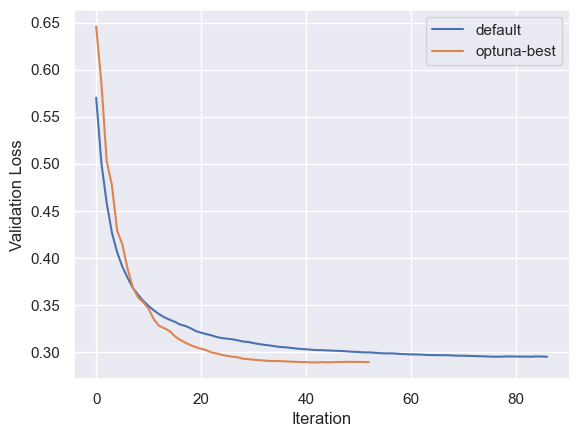

In [25]:
print("Best params:", study.best_params)
print("Best validation ROC AUC:", study.best_value)

from optuna.importance import get_param_importances

param_importances = get_param_importances(study)
print("Hyperparameter importances:", param_importances)

import matplotlib.pyplot as plt

default_boost = Boosting(early_stopping_rounds=10, learning_rate=1., n_estimators=100, base_model_params={'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5})
default_boost.fit(X_train, y_train, X_val, y_val)
hist_def = default_boost.history["validation_loss"]

base_model_params_best = {
    'max_depth': study.best_params['max_depth'],
    'min_samples_split': study.best_params['min_samples_split'],
    'min_samples_leaf': study.best_params['min_samples_leaf']
}
optional_params_best = {
    'learning_rate': study.best_params['learning_rate'],
    'n_estimators': study.best_params['n_estimators'],
    'bagging_temperature': study.best_params['bagging_temperature'],
    'bootstrap_type': study.best_params['bootstrap_type'],
    'rsm': study.best_params['rsm'],
    'quantization_type': study.best_params['quantization_type'],
    'nbins': study.best_params['nbins']
}
best_boost = Boosting(early_stopping_rounds=10, base_model_params=base_model_params_best, **optional_params_best)
best_boost.fit(X_train, y_train, X_val, y_val)
hist_best = best_boost.history["validation_loss"]

plt.plot(hist_def, label="default")
plt.plot(hist_best, label="optuna-best")
plt.xlabel("Iteration")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()


### 3.3. Готовые реализации (1 балл)

Библиотек для бустингов существует много, но активно используются лишь три. Ваша задача — попробовать их в деле, посмотреть на их уникальные фишки и понять, что вам нравится больше всего

Возьмите любую из популярных библиотек: <font color='lightblue'>`xgboost`</font>, <font color='lightgreen'>`lightgbm`</font>, <font color='palegoldenrod'>`catboost`</font>.
Ваша задача — взять одну из них, подобрать те же оптимальные параметры, что и выше, плюс что-то, что вам понравилось в них больше всего (может быть абсолютно любая фишка из пунктов выше или что-то, что вы найдете сами, не обязательно эксклюзивное), и сравнить две оптимизированные модели по
- динамике функции потерь (на обучающей и на валидационной выборке)
- времени обучения

In [11]:
import lightgbm as lgb

from datetime import datetime
from sklearn.metrics import roc_auc_score
import optuna
import os

def objective(trial):

    time_then = datetime.now()
    params = {
        "objective": "binary",
        "metric": "auc",
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-2, 1.0),
        "num_leaves": trial.suggest_int("num_leaves", 31, 256),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "verbose": -1,
        # … другие параметры …
    }
    dtrain = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
    dvalid = lgb.Dataset(X_val,   label=y_val, free_raw_data=False)
    boosting = None
    n_rounds = trial.suggest_int("n_estimators", 50, 200)
    for i in range(n_rounds):
        boosting = lgb.train(
            params,
            dtrain,
            num_boost_round=1,
            init_model=boosting,
            valid_sets=[dvalid],
            # verbose_eval=False,
        )
        preds = boosting.predict(X_val)
        val_auc = roc_auc_score(y_val, preds)
        trial.report(val_auc, i)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()
    return val_auc

study = optuna.create_study(
    storage=f'sqlite:///{os.path.join(os.getcwd(), "optuna_study.db")}',
    load_if_exists=True,
    study_name='lgb_optimization',
    pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=30, interval_steps=1),
    direction='maximize', sampler=optuna.samplers.TPESampler(seed=42)
    )
study.optimize(objective, n_trials=50)

print('Best AUC:', study.best_value)
print('Best params:', study.best_params)


[I 2025-05-27 02:07:37,497] A new study created in RDB with name: lgb_optimization
[I 2025-05-27 02:07:44,160] Trial 0 finished with value: 0.945939323118085 and parameters: {'learning_rate': 0.05611516415334506, 'num_leaves': 245, 'max_depth': 8, 'n_estimators': 140}. Best is trial 0 with value: 0.945939323118085.
[I 2025-05-27 02:07:47,887] Trial 1 finished with value: 0.9352782852942092 and parameters: {'learning_rate': 0.020513382630874502, 'num_leaves': 66, 'max_depth': 3, 'n_estimators': 180}. Best is trial 0 with value: 0.945939323118085.
[I 2025-05-27 02:07:51,857] Trial 2 finished with value: 0.9475305168366414 and parameters: {'learning_rate': 0.1593052261624101, 'num_leaves': 191, 'max_depth': 3, 'n_estimators': 196}. Best is trial 2 with value: 0.9475305168366414.
[I 2025-05-27 02:07:53,088] Trial 3 finished with value: 0.9443138071873904 and parameters: {'learning_rate': 0.46225890010208287, 'num_leaves': 78, 'max_depth': 4, 'n_estimators': 77}. Best is trial 2 with value:

Best AUC: 0.9475305168366414
Best params: {'learning_rate': 0.1593052261624101, 'num_leaves': 191, 'max_depth': 3, 'n_estimators': 196}


In [12]:
import matplotlib.pyplot as plt
import optuna.visualization as vis
# Визуализация важности гиперпараметров
fig = vis.plot_param_importances(study)
fig.show()
# Визуализация зависимости между гиперпараметрами и целевой метрикой
fig = vis.plot_optimization_history(study)
fig.show()
# Визуализация зависимости между гиперпараметрами и целевой метрикой
fig = vis.plot_slice(study)
fig.show()
# Визуализация зависимости между гиперпараметрами и целевой метрикой
fig = vis.plot_parallel_coordinate(study)
fig.show()

<font color='plum'>**Вопрос:** Какая архитектура вам нравится больше всего и почему?</font>

<font color='plum'>**Ответ**: ... </font>

### Бонус. Random Forest (0.5 балла)

Если очень захотеть, оптуна может оптимизировать все, что угодно, даже нейросети. Давайте противопоставим бустингу его злейшего врага — алгоритм Random Forest.

Возьмите реализацию случайного леса из <font color='lightgreen'>`lightgbm`</font>. Посмотрите, какие там есть гиперпараметры, переберите что-либо из них вместе с `max_depth` и `n_estimators`.

Сравните его качество и динамику функции потерь (на обучающей и на валидационной выборке) с таковыми у бустинга и сделайте вывод, а нужен ли Random Forest?

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 3.4. Бустинг и вероятности (0.5 балла)

С качеством мы более-менее разобрались, но что насчет вероятностей? Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности?

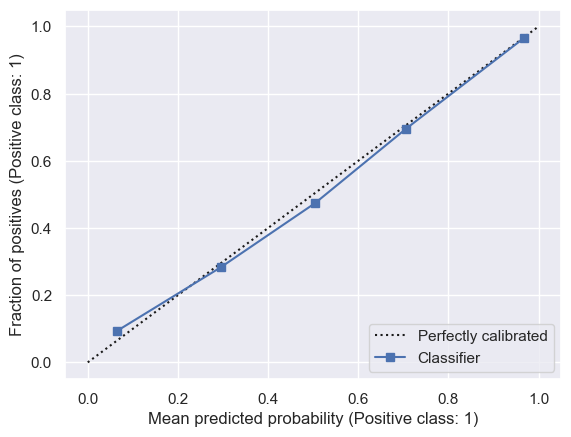

In [20]:
from sklearn.calibration import calibration_curve, CalibrationDisplay

params = study.best_params
dtrain = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
dvalid = lgb.Dataset(X_val, label=y_val, free_raw_data=False)

boosting = lgb.train(
    params,
    dtrain,
    valid_sets=[dvalid],
)
preds = boosting.predict(X_val)
y_prob_boosting = boosting.predict(X_test, num_iteration=boosting.best_iteration)

disp = CalibrationDisplay.from_predictions(y_test, np.clip(y_prob_boosting, 0, 1))
# disp.plot()



Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

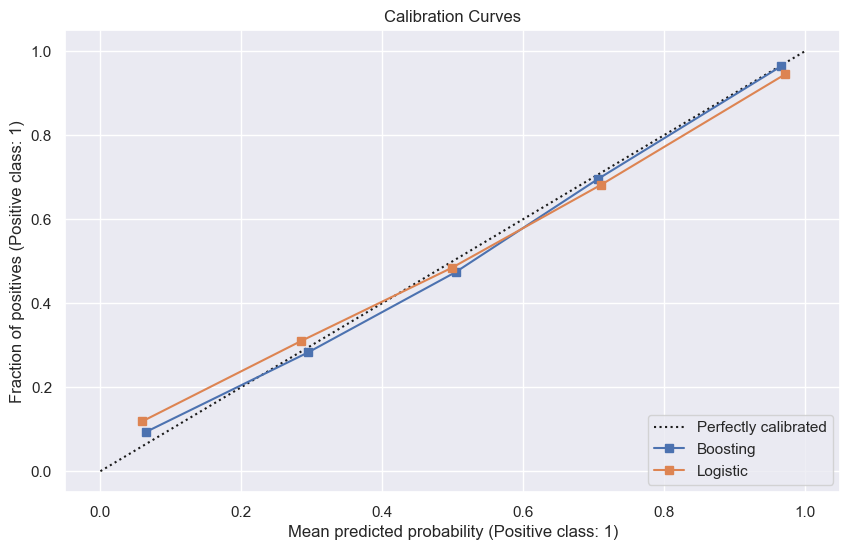

Boosting ROC-AUC: 0.9376, average precision: 0.9616
Logistic ROC-AUC: 0.9377, average precision: 0.9639


In [27]:
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score

params = study.best_params
dtrain = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
dvalid = lgb.Dataset(X_val, label=y_val, free_raw_data=False)

boosting = lgb.train(
    params,
    dtrain,
    valid_sets=[dvalid],
)
preds = boosting.predict(X_val)
y_prob_boosting = boosting.predict(X_test, num_iteration=boosting.best_iteration)

y_prob_logistic = LogisticRegression(max_iter=1000).fit(X_train, y_train).predict_proba(X_test)[:, 1]

fig,ax = plt.subplots(figsize=(10, 6))
disp_boost = CalibrationDisplay.from_predictions(y_test, np.clip(y_prob_boosting, 0, 1), name='Boosting', ax=ax)
disp_plot = CalibrationDisplay.from_predictions(y_test, np.clip(y_prob_logistic, 0, 1), name='Logistic', ax=ax)
plt.title('Calibration Curves')
plt.show()

print(f'Boosting ROC-AUC: {roc_auc_score(y_test, y_prob_boosting):.4f}, average precision: {average_precision_score(y_test, y_prob_boosting):.4f}')
print(f'Logistic ROC-AUC: {roc_auc_score(y_test, y_prob_logistic):.4f}, average precision: {average_precision_score(y_test, y_prob_logistic):.4f}')


## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2025 года?

# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚